In [1]:
!wget --no-check-certificate \
    "https://github.com/nikitapawale28/FingerPrintData/archive/refs/heads/main.zip" \
    -O "/content/sample_data/FingerPrint.zip"

--2023-05-28 00:26:25--  https://github.com/nikitapawale28/FingerPrintData/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/nikitapawale28/FingerPrintData/zip/refs/heads/main [following]
--2023-05-28 00:26:25--  https://codeload.github.com/nikitapawale28/FingerPrintData/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/content/sample_data/FingerPrint.zip’

/content/sample_dat     [  <=>               ]   4.19M  13.8MB/s    in 0.3s    

2023-05-28 00:26:25 (13.8 MB/s) - ‘/content/sample_data/FingerPrint.zip’ saved [4394944]



In [2]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sample_data/FingerPrint.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content/sample_data/') #Extracts the files into the /tmp folder
zip_ref.close()

In [3]:
mkdir '/content/sample_data/LowResolution'

In [4]:
cd /content/sample_data/FingerPrintData-main

/content/sample_data/FingerPrintData-main


In [5]:
import os
os.rename('DB1_B (1)', 'DB1_B')

In [6]:
from PIL import Image
import os

# Define the input and output directories
input_dir = '/content/sample_data/FingerPrintData-main/DB1_B'
output_dir = '/content/sample_data/LowResolution'



scale_factor = 0.2

# Loop through each image in the input directory
for filename in os.listdir(input_dir):
    # Load the image
    input_image = Image.open(os.path.join(input_dir, filename))
    new_size = (int(input_image.size[0] * scale_factor), int(input_image.size[1] * scale_factor))
    output_image = input_image.resize(new_size, resample=Image.LANCZOS)   
    # Save the output image to the output directory
    output_image.save(os.path.join(output_dir, filename))

In [7]:
import os 
import re 
from scipy import ndimage, misc 
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import img_to_array


from skimage.transform import resize, rescale
import matplotlib.pyplot as plt
import numpy as np
np. random. seed(0)
import cv2 as cv2

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense ,Conv2D,MaxPooling2D ,Dropout
from tensorflow.keras.layers import Conv2DTranspose, UpSampling2D, add
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf

print(tf.__version__)

2.12.0


In [8]:
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)
# defining the size of the image
SIZE = 256
high_img = []
path = '/content/sample_data/FingerPrintData-main/DB1_B'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):       
        img = cv2.imread(path + '/'+i,1)
        # open cv reads images in BGR format so we have to convert it to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        high_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 374.98it/s]


In [9]:
low_img = []
path = '/content/sample_data/LowResolution'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
    if i == '855.jpg':
        break
    else: 
        img = cv2.imread(path + '/'+i,1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        #resizing image
        img = cv2.resize(img, (SIZE, SIZE))
        img = img.astype('float32') / 255.0
        low_img.append(img_to_array(img))

100%|██████████| 66/66 [00:00<00:00, 1379.18it/s]


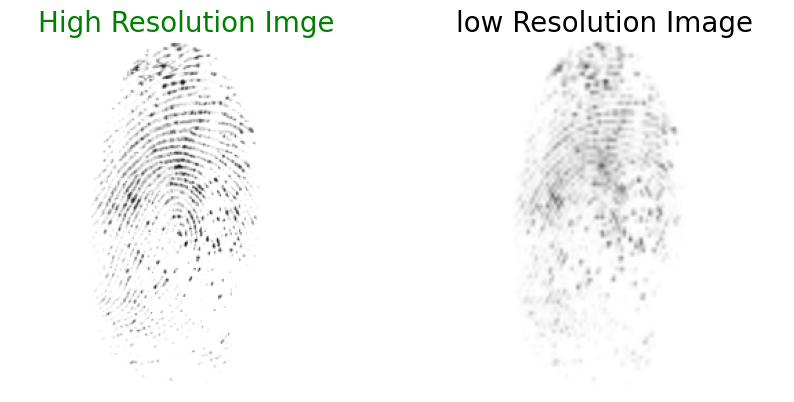

In [10]:
for i in range(1):
    a = np.random.randint(0,105)
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.title('High Resolution Imge', color = 'green', fontsize = 20)
    plt.imshow(high_img[a])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title('low Resolution Image ', color = 'black', fontsize = 20)
    plt.imshow(low_img[a])
    plt.axis('off')

In [11]:
train_high_image = high_img[:55]
train_low_image = low_img[:55]
train_high_image = np.reshape(train_high_image,(len(train_high_image),SIZE,SIZE,3))
train_low_image = np.reshape(train_low_image,(len(train_low_image),SIZE,SIZE,3))

validation_high_image = high_img[55:60]
validation_low_image = low_img[55:60]
validation_high_image= np.reshape(validation_high_image,(len(validation_high_image),SIZE,SIZE,3))
validation_low_image = np.reshape(validation_low_image,(len(validation_low_image),SIZE,SIZE,3))


test_high_image = high_img[60:]
test_low_image = low_img[60:]
test_high_image= np.reshape(test_high_image,(len(test_high_image),SIZE,SIZE,3))
test_low_image = np.reshape(test_low_image,(len(test_low_image),SIZE,SIZE,3))

print("Shape of training images:",train_high_image.shape)
print("Shape of test images:",test_high_image.shape)
print("Shape of validation images:",validation_high_image.shape)

Shape of training images: (55, 256, 256, 3)
Shape of test images: (6, 256, 256, 3)
Shape of validation images: (5, 256, 256, 3)


In [12]:
def PSNR(y_true,y_pred):
    mse=tf.reduce_mean( (y_true - y_pred) ** 2 )
    return 20 * log10(1/ (mse ** 0.5))

def log10(x):
    numerator = tf.math.log(x)
    denominator = tf.math.log(tf.constant(10, dtype=numerator.dtype))
    return numerator / denominator

def pixel_MSE(y_true,y_pred):
    return tf.reduce_mean( (y_true - y_pred) ** 2 )

In [13]:
#@title Default title text
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Activation, Conv2DTranspose
import tensorflow as tf




def fsrcnn_model():
    model = Sequential()
    print("done1")
    #feature extraction
    model.add(Conv2D(filters=56, kernel_size=5, padding='same', input_shape=(None, None, 3)))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=16, kernel_size=1, padding='same'))
    model.add(Activation('relu'))
    print("done2")
    #shrinking
    model.add(Conv2D(filters=12, kernel_size=1, padding='same'))
    model.add(Activation('relu'))
    print("done3")
    #nonlinear mapping
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters=12, kernel_size=3, padding='same'))
    model.add(Activation('relu'))
    print("done4")
    #expanding
    model.add(Conv2D(filters=56, kernel_size=1, padding='same'))
    model.add(Activation('relu'))
    print("done5")
    #Decpnvolution
    model.add(Conv2DTranspose(filters=1, kernel_size=9, strides=1, padding='same'))
    print("done6")
    #inputs = tf.keras.layers.Input( shape=( 256,256,3, ) )
    #input1 = tf.keras.Input(shape=(None,None,3,))
    #output=model(input1)
    #model = tf.keras.Model(inputs=input1, outputs=output)
    print("done7")
    return model

In [14]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

def train_model():
    #model = build_model()
    model = fsrcnn_model()
    print("done8")
    optimizer = Adam(lr=0.0001)
    print("done9")
    model.compile(optimizer=optimizer, loss=MeanSquaredError())
    print("done10")
    # Load and preprocess training data
    x_train, y_train =  train_low_image, train_high_image
    print(x_train.shape)
    print(y_train.shape)

    model.fit(x_train, y_train, epochs=100, batch_size=1)
    return model

In [15]:
FSRCNN= train_model()

done1
done2
done3
done4
done5
done6
done7
done8
done9
done10
(55, 256, 256, 3)
(55, 256, 256, 3)
Epoch 1/100
55/55 [==============================] - 13s 10ms/step - loss: 0.0797
Epoch 2/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0137
Epoch 3/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 4/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 5/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 6/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 7/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0083
Epoch 8/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0077
Epoch 9/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 10/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0060
Epoch 11/100
55/55 [==============================] - 0s 8ms/step - loss: 0.0054
Epoch 12/100
55/55 

In [16]:
FSRCNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, None, None, 56)    4256      
                                                                 
 activation (Activation)     (None, None, None, 56)    0         
                                                                 
 conv2d_1 (Conv2D)           (None, None, None, 16)    912       
                                                                 
 activation_1 (Activation)   (None, None, None, 16)    0         
                                                                 
 conv2d_2 (Conv2D)           (None, None, None, 12)    204       
                                                                 
 activation_2 (Activation)   (None, None, None, 12)    0         
                                                                 
 conv2d_3 (Conv2D)           (None, None, None, 12)    1

In [17]:
def plot_images(high,low,predicted):
    plt.figure(figsize=(15,15))
    plt.subplot(1,3,1)
    plt.title('High Image', color = 'green', fontsize = 20)
    plt.imshow(high)
    plt.subplot(1,3,2)
    plt.title('Low Image ', color = 'black', fontsize = 20)
    plt.imshow(low)
    plt.subplot(1,3,3)
    plt.title('Predicted Image ', color = 'Red', fontsize = 20)
    plt.imshow(predicted,cmap='gray')
   
    plt.show()

1/1 [==============================] - 0s 323ms/step
(1, 256, 256, 1)
(256, 256, 1)


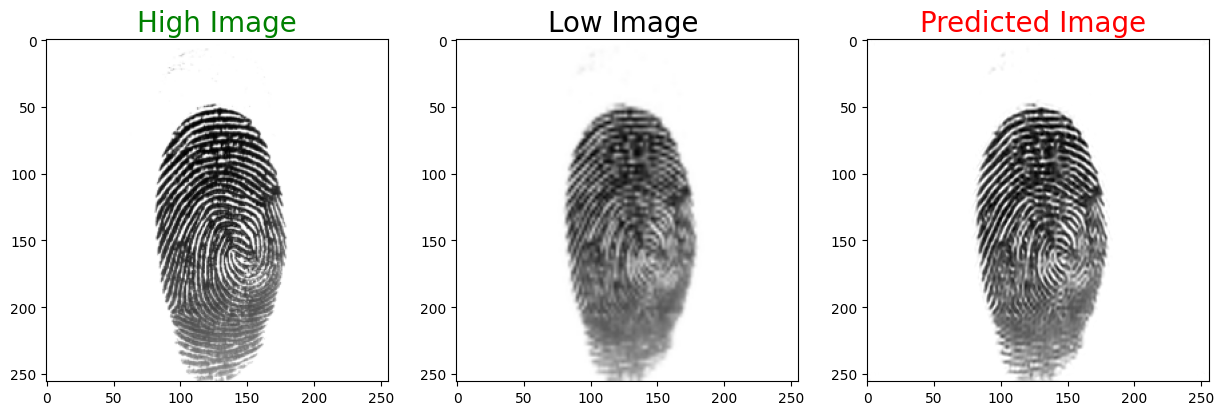

PSNR tf.Tensor(24.003935, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 36ms/step
(1, 256, 256, 1)
(256, 256, 1)


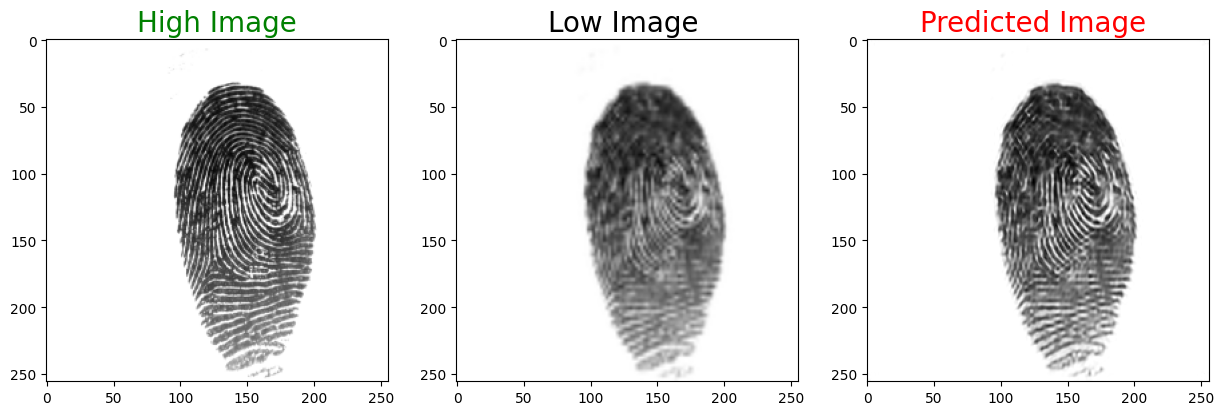

PSNR tf.Tensor(23.393059, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 42ms/step
(1, 256, 256, 1)
(256, 256, 1)


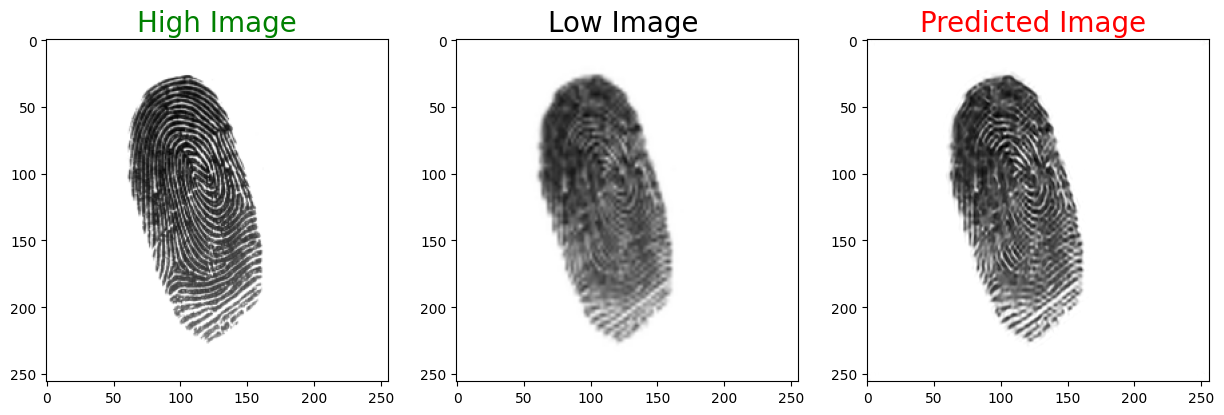

PSNR tf.Tensor(23.581944, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 31ms/step
(1, 256, 256, 1)
(256, 256, 1)


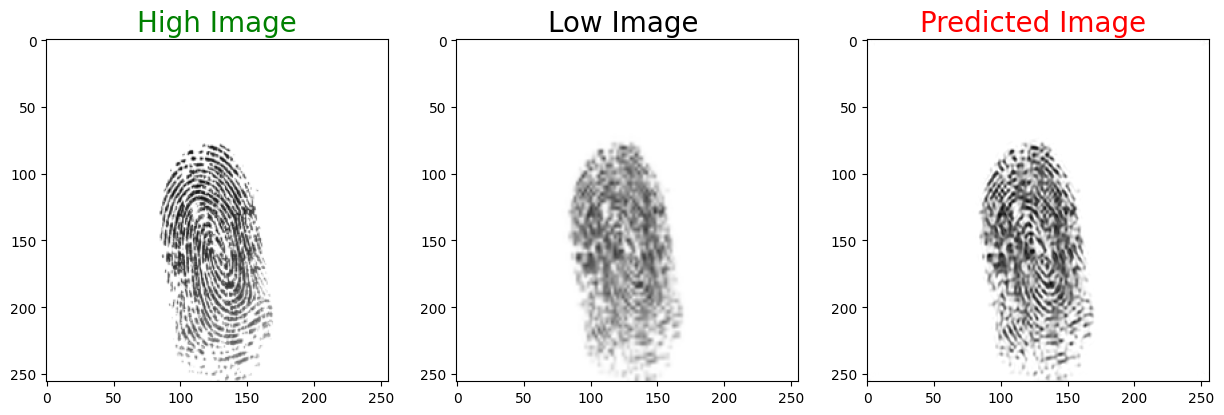

PSNR tf.Tensor(23.173983, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 27ms/step
(1, 256, 256, 1)
(256, 256, 1)


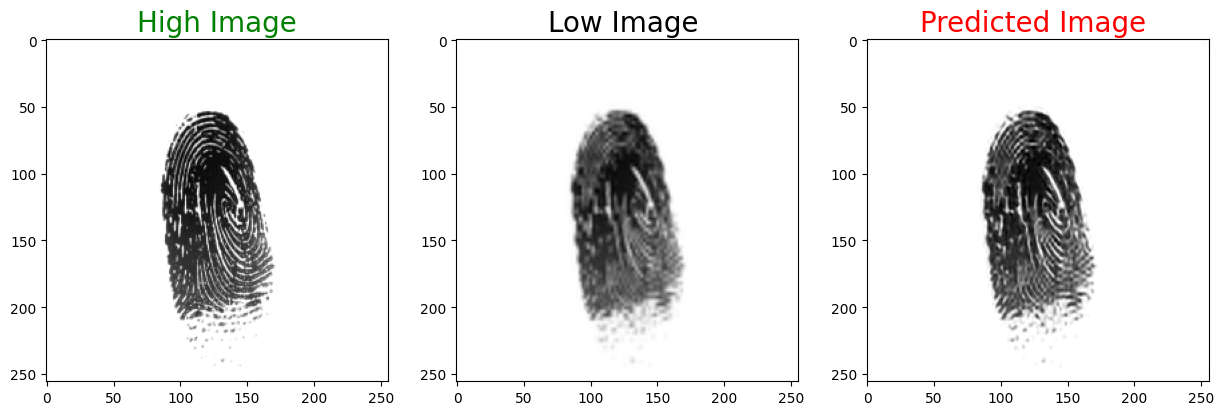

PSNR tf.Tensor(25.315245, shape=(), dtype=float32) dB
1/1 [==============================] - 0s 31ms/step
(1, 256, 256, 1)
(256, 256, 1)


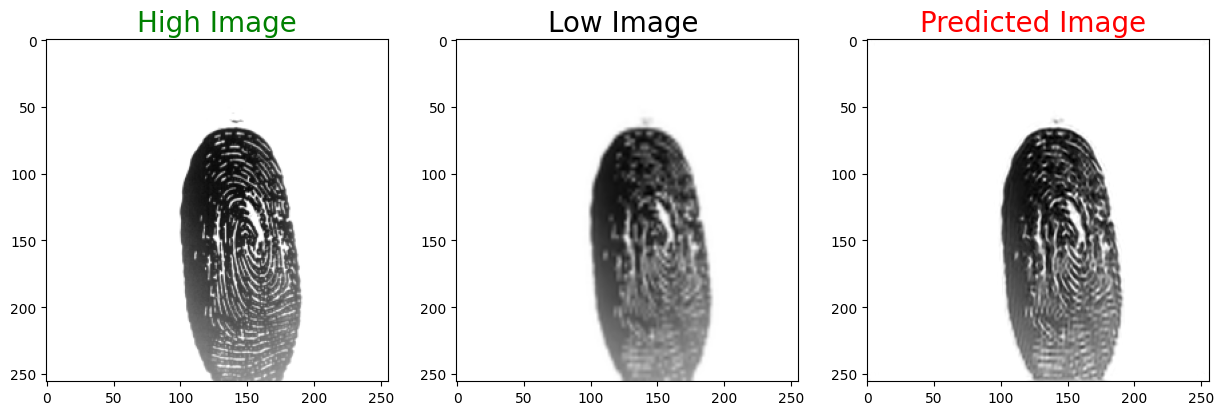

PSNR tf.Tensor(26.105236, shape=(), dtype=float32) dB


In [18]:
for i in range(6):
    input_image = test_low_image[i]  # Replace with the actual test_low_image
    resized_image = tf.image.resize(input_image, (SIZE, SIZE))
    resized_image = tf.expand_dims(resized_image, axis=0)
    predicted = np.clip(FSRCNN.predict(resized_image), 0.0, 1.0)
    print(predicted.shape)
    predicted = np.reshape(predicted, (256, 256, 1))
    #predicted = np.squeeze(predicted, axis=0)
    print(predicted.shape)
    plot_images(test_high_image[i], test_low_image[i], predicted)
    print('PSNR', PSNR(test_high_image[i], predicted), 'dB')

In [19]:
for i in range(0,6):
    input_image = test_low_image[i]  # Replace with the actual test_low_image
    resized_image = tf.image.resize(input_image, (SIZE, SIZE))
    resized_image = tf.expand_dims(resized_image, axis=0)
    predicted = np.clip(FSRCNN.predict(resized_image), 0.0, 1.0)
    predicted = np.reshape(predicted, (256, 256, 1))
    print('PSNR',PSNR(test_high_image[i],predicted).numpy(),'dB')

1/1 [==============================] - 0s 20ms/step
PSNR 24.003935 dB
1/1 [==============================] - 0s 20ms/step
PSNR 23.393059 dB
1/1 [==============================] - 0s 20ms/step
PSNR 23.581944 dB
1/1 [==============================] - 0s 19ms/step
PSNR 23.173983 dB
1/1 [==============================] - 0s 20ms/step
PSNR 25.315245 dB
1/1 [==============================] - 0s 18ms/step
PSNR 26.105236 dB
